# Fake News Detection Dataset Overview

## Dataset Source
This dataset is sourced from [Kaggle's Fake News Prediction Dataset](https://www.kaggle.com/datasets/rajatkumar30/fake-news/data). It contains 6,335 news articles labeled as either "FAKE" or "REAL".

## Key Features
- **Title**: Headline of the news article
- **Text**: Full content of the article
- **Label**: Classification label (REAL/FAKE)

## Data Characteristics
- **Class Distribution** (Perfectly Balanced):
  - REAL: 3,171 articles (50.1%)
  - FAKE: 3,164 articles (49.9%)
- **Text Length**:
  - Average article length: ~776 words



## 1. Import Libraries
This section imports necessary libraries for data manipulation, text processing, machine learning, and visualization.

In [1]:
# Data manipulation and analysis libraries.
import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from functools import lru_cache
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load and Inspect the Dataset
Loads the dataset, renames a column, checks its shape, displays the first few rows, and checks for missing values.

In [2]:
# Load the dataset
news_dataset = pd.read_csv('news.csv')

news_dataset.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [3]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
news_dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Rename the 'Unnamed: 0' column to 'id'
news_dataset.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
# Display the first 5 rows of the dataset
news_dataset.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Check for missing values in each column
print(news_dataset.isnull().sum())

id       0
title    0
text     0
label    0
dtype: int64


In [8]:
# Display the shape of the dataset (number of rows and columns)
print(f"Dataset shape: {news_dataset.shape}")

Dataset shape: (6335, 4)


## 3. Exploratory Data Analysis (EDA)
Performs EDA to understand the distribution of labels and the length of the text data.

In [9]:
# Count the occurrences of each label ('FAKE' and 'REAL')
label_counts = news_dataset['label'].value_counts()
print(label_counts)

# Calculate the percentages
total_count = len(news_dataset)  # Or label_counts.sum()
percentages = (label_counts / total_count) * 100

# Print the percentages, formatted nicely
print("\nPercentage of each label:")
for label, percentage in percentages.items():
    print(f"{label}: {percentage:.2f}%")

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Percentage of each label:
REAL: 50.06%
FAKE: 49.94%


***Dataset is well-balanced: almost identical counts and percentages for REAL and FAKE labels (~50/50 split).***

In [10]:
# Calculate statistics (average, max, min) of word counts in the 'title' column.
word_counts_title = news_dataset['title'].str.split().str.len()
print(f"\\nAverage number of words in 'title': {word_counts_title.mean()}")
print(f"Maximum number of words in 'title': {word_counts_title.max()}")
print(f"Minimum number of words in 'title': {word_counts_title.min()}")

\nAverage number of words in 'title': 10.496448303078138
Maximum number of words in 'title': 53
Minimum number of words in 'title': 1


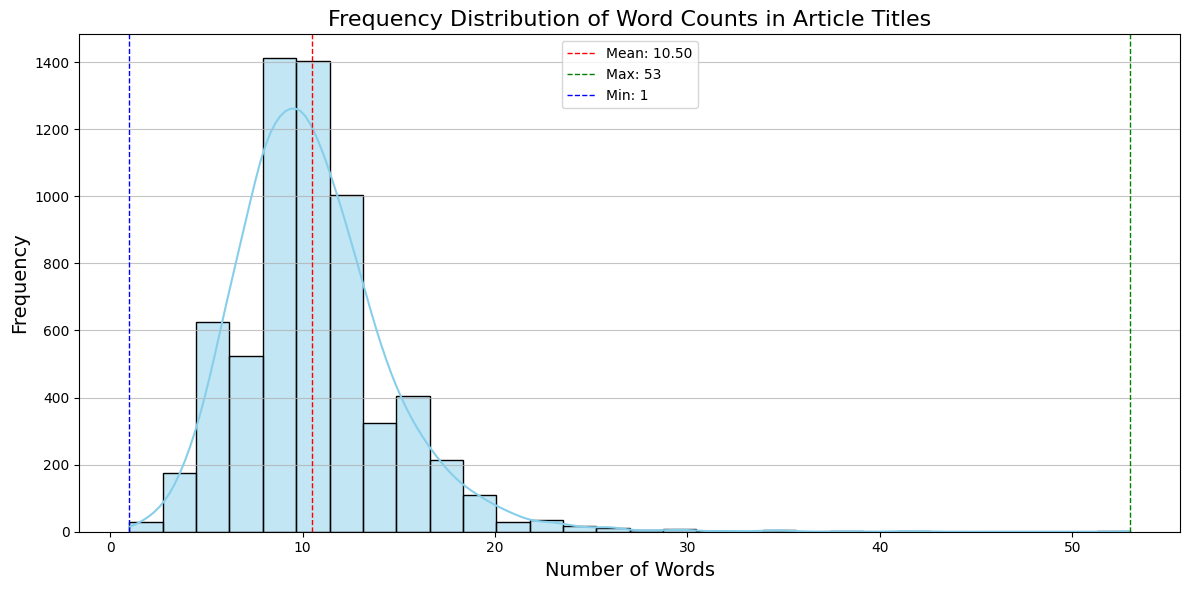

In [11]:
# Calculate word counts for the 'title' column
word_counts_title = news_dataset['title'].str.split().str.len()

# Create a figure and axes
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

# Plot the distribution using seaborn's histplot (more informative than a basic histogram)
sns.histplot(word_counts_title, kde=True, bins=30, color='skyblue')  # Use histplot with KDE

# Add labels and title
plt.title('Frequency Distribution of Word Counts in Article Titles', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)  # Add a light grid for better readability

# Add vertical lines for mean, max and min  (optional, but very helpful)
plt.axvline(word_counts_title.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {word_counts_title.mean():.2f}')
plt.axvline(word_counts_title.max(), color='green', linestyle='dashed', linewidth=1, label=f'Max: {word_counts_title.max()}')
plt.axvline(word_counts_title.min(), color='blue', linestyle='dashed', linewidth=1, label=f'Min: {word_counts_title.min()}')


plt.legend()  # Show the legend for the mean line
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [12]:
# Calculate statistics (average, max, min) of word counts in the 'text' column.
word_counts = news_dataset['text'].str.split().str.len()
print(f"Average number of words in 'text': {word_counts.mean()}")
print(f"Maximum number of words in 'text': {word_counts.max()}")
print(f"Minimum number of words in 'text': {word_counts.min()}")

Average number of words in 'text': 776.3007103393844
Maximum number of words in 'text': 20891
Minimum number of words in 'text': 0


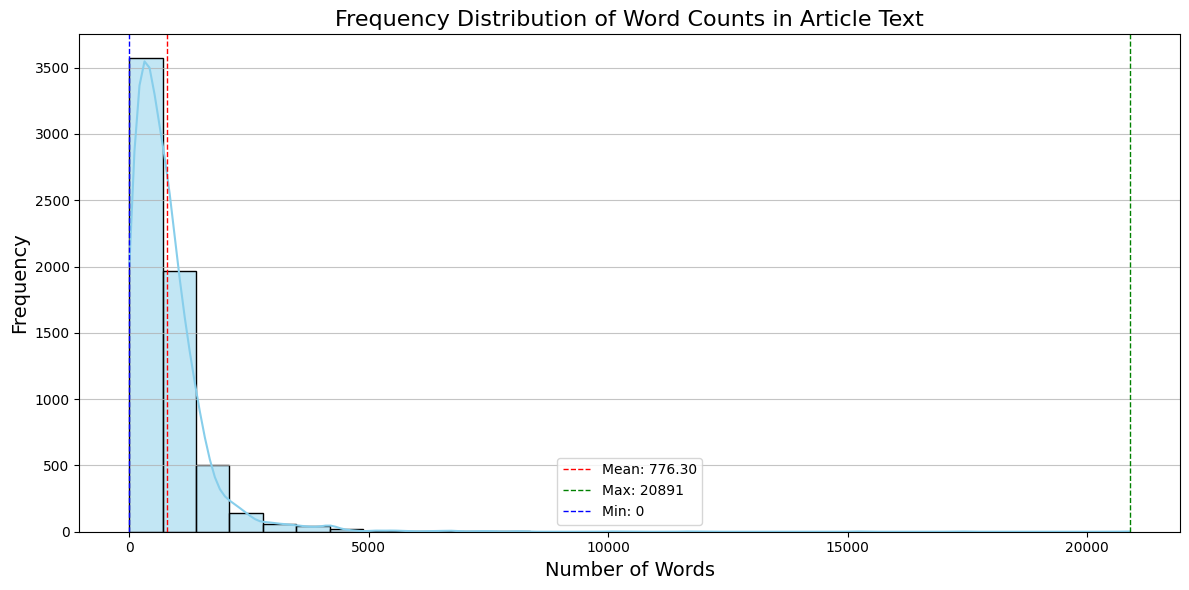

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word counts for the 'text' column (changed from 'title' to 'text')
word_counts_text = news_dataset['text'].str.split().str.len()

# Create a figure and axes
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

# Plot the distribution using seaborn's histplot
sns.histplot(word_counts_text, kde=True, bins=30, color='skyblue')  # Using word_counts_text now

# Add labels and title - Updated title to reflect 'text'
plt.title('Frequency Distribution of Word Counts in Article Text', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# Add vertical lines for mean, max and min
plt.axvline(word_counts_text.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {word_counts_text.mean():.2f}')
plt.axvline(word_counts_text.max(), color='green', linestyle='dashed', linewidth=1, label=f'Max: {word_counts_text.max()}')
plt.axvline(word_counts_text.min(), color='blue', linestyle='dashed', linewidth=1, label=f'Min: {word_counts_text.min()}')

plt.legend()
plt.tight_layout()
plt.show()

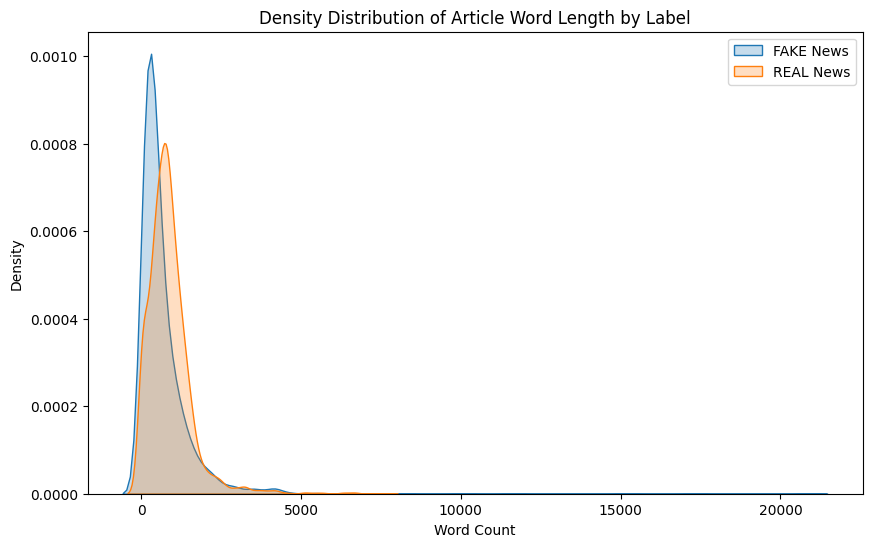

In [14]:
# Visualize the distribution of article word lengths for 'FAKE' and 'REAL' news

# Separate data by label
word_counts = news_dataset['text'].str.split().str.len()
fake_news_word_counts = word_counts[news_dataset['label'] == 'FAKE']
real_news_word_counts = word_counts[news_dataset['label'] == 'REAL']

# Create density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(fake_news_word_counts, label='FAKE News', fill=True)
sns.kdeplot(real_news_word_counts, label='REAL News', fill=True)

plt.title('Density Distribution of Article Word Length by Label')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

**Insights from the Density Distribution of Article Word Length by Label**

1.  **Peak Density Difference**:
    -   The peak density for **FAKE news** articles occurs at a **lower word count** compared to **REAL news**, suggesting that **FAKE news** articles are generally **shorter**.

2.  **Longer Real News Articles**:
    -   **REAL news** articles tend to have a **wider spread**, indicating that some **real news** articles are significantly longer than **fake news** ones.

3.  **Extreme Outliers**:
    -   There are some outliers with very high word counts (>10,000 words), but they are relatively rare.

### Conclusions:

-   **Fake news** articles may be designed to be **shorter and more digestible**, making them more shareable.
-   **Real news** articles might include **more in-depth analysis and details**, leading to longer word counts.
-   Length alone is not a definitive factor but can be **used as a feature** in **fake news** detection models based on this data.

## 4. Data Preprocessing
Combines text fields, performs stemming, and converts text data into numerical features using TF-IDF.

In [15]:
# Combine 'title' and 'text' columns into a single 'combined' column
news_dataset['combined'] = news_dataset['title'] + ' ' + news_dataset['text']

# Prepare data for feature extraction and modeling
X = news_dataset['combined']
Y = news_dataset['label']

In [16]:
# Initialize stemmer, stop words, and regex pattern
stemmer = PorterStemmer()
STOP_WORDS = set(stopwords.words('english'))
REGEX_PATTERN = re.compile('[^a-zA-Z]')

@lru_cache(maxsize=10000)
def cached_stem(word):
    """Stems a single word using the cached stemmer."""
    return stemmer.stem(word)

def stemming(content):
    """Preprocesses text content."""
    stemmed_content = REGEX_PATTERN.sub(' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = [cached_stem(word) for word in stemmed_content.split() if word not in STOP_WORDS]
    return ' '.join(stemmed_content)

X = X.apply(stemming)

## 5. Train-Test Split
Splits the data into training and testing sets, ensuring stratified sampling.

In [17]:
# Split the data, then encode labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)  # Fit on training data
Y_test = le.transform(Y_test)      # Transform test data

In [18]:
# TF-IDF Vectorization (fit on training data, transform both)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test = vectorizer.transform(X_test)       # Transform test data

print(f"TF-IDF matrix shape: {X_train.shape}")

TF-IDF matrix shape: (5068, 39978)


## 6. Model Training
Trains a Logistic Regression model on the training data.

In [19]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## 7. Model Evaluation
Evaluates the model's performance.

Training Data Accuracy: 0.9517
Test Data Accuracy: 0.9227

Total test samples: 1267
Total misclassified samples: 98
Misclassification rate: 7.73%

Breakdown of misclassifications:
True Fake predicted as Real (False Positive): 34
True Real predicted as Fake (False Negative): 64

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.95      0.92       633
        REAL       0.94      0.90      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



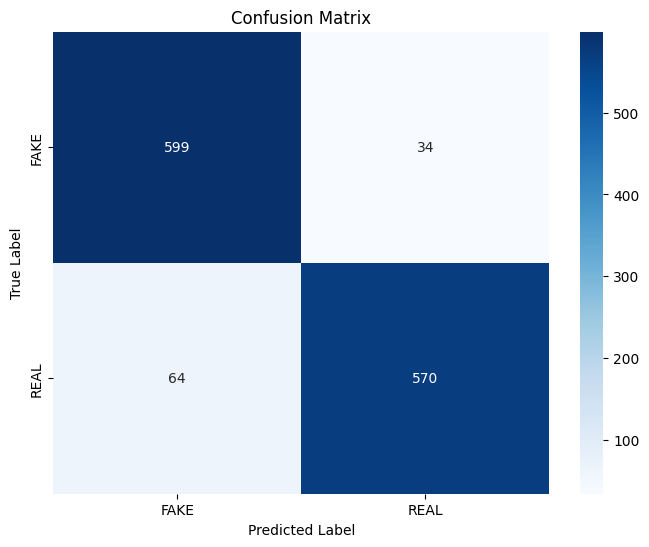


Cross-validation scores: [0.91420118 0.90433925 0.90927022 0.90227048 0.90819348]
Average CV Score: 0.9077 (+/- 0.0083)


In [20]:
# Predictions on training and test sets
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Real)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, X_train_prediction)
test_accuracy = accuracy_score(Y_test, X_test_prediction)

print(f'Training Data Accuracy: {train_accuracy:.4f}')
print(f'Test Data Accuracy: {test_accuracy:.4f}')

# Analyze misclassifications
total_test_samples = len(Y_test)
misclassified_samples = np.sum(Y_test != X_test_prediction)
print(f'\nTotal test samples: {total_test_samples}')
print(f'Total misclassified samples: {misclassified_samples}')
print(f'Misclassification rate: {(misclassified_samples / total_test_samples) * 100:.2f}%')

true_fake_predicted_real = np.sum((Y_test == 0) & (X_test_prediction == 1))  # False Positives
true_real_predicted_fake = np.sum((Y_test == 1) & (X_test_prediction == 0))  # False Negatives
print(f'\nBreakdown of misclassifications:')
print(f'True Fake predicted as Real (False Positive): {true_fake_predicted_real}')
print(f'True Real predicted as Fake (False Negative): {true_real_predicted_fake}')

# Classification report
print('\nClassification Report:')
print(classification_report(Y_test, X_test_prediction, target_names=['FAKE', 'REAL']))

# Confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print('\nCross-validation scores:', cv_scores)
print(f'Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')  # Standard deviation

## 8. Plotting Top Features

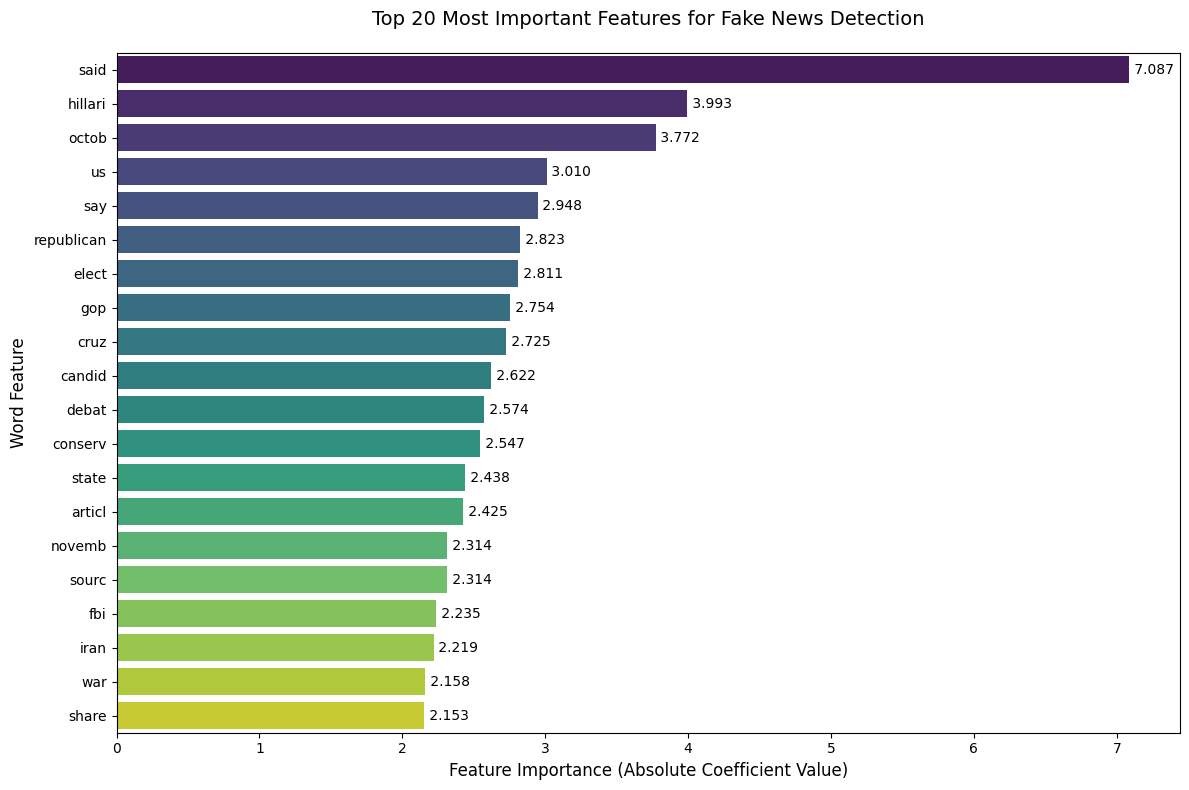


Feature Importance Values:
said            7.087
hillari         3.993
octob           3.772
us              3.010
say             2.948
republican      2.823
elect           2.811
gop             2.754
cruz            2.725
candid          2.622
debat           2.574
conserv         2.547
state           2.438
articl          2.425
novemb          2.314
sourc           2.314
fbi             2.235
iran            2.219
war             2.158
share           2.153


In [21]:
# Feature importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(model.coef_[0])  # Absolute values for logistic regression
}).sort_values('importance', ascending=False)

# Plot Top Features (Combined)
top_features = feature_importance.head(20)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='importance', y='feature', data=top_features, hue='feature', palette='viridis', legend=False) # Added hue and legend=False
for i, v in enumerate(top_features['importance']):
    ax.text(v + 0.005, i, f' {v:.3f}', va='center', fontsize=10)  # Added a small offset (v + 0.005)
plt.title('Top 20 Most Important Features for Fake News Detection', pad=20, fontsize=14)
plt.xlabel('Feature Importance (Absolute Coefficient Value)', fontsize=12)
plt.ylabel('Word Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nFeature Importance Values:")
for feature, importance in zip(top_features['feature'], top_features['importance']):
    print(f"{feature:<15} {importance:.3f}")